set up basics

In [1]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

!pip install geopy
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values



# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

!pip install folium
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


Collect Covid Data from https://coronavirus-staging.data.gov.uk/developers-guide

In [2]:
from requests import get


def get_data(url):
    response = get(endpoint, timeout=10)
    
    if response.status_code >= 400:
        raise RuntimeError(f'Request failed: { response.text }')
        
    return response.json()
    

if __name__ == '__main__':
    endpoint = (
        'https://api.coronavirus.data.gov.uk/v1/data?'
        'filters=areaType=ltla; date=2020-07-01&'
        'structure={"date":"date","CumCases":"cumCasesBySpecimenDate", "areaName":"areaName"}'
    )
    
    data = get_data(endpoint)
    data=json_normalize(data, 'data')
    
cvDf=pd.DataFrame(data)
    
cvDf
    

,CumCases,areaName,date
0,184,Adur,2020-07-01
1,319,Arun,2020-07-01
2,560,Ashfield,2020-07-01
3,1269,Ashford,2020-07-01
4,759,Aylesbury Vale,2020-07-01
5,259,Babergh,2020-07-01
6,708,Barking and Dagenham,2020-07-01
7,1585,Barnet,2020-07-01
8,1874,Barnsley,2020-07-01
9,939,Basingstoke and Deane,2020-07-01


Collect FourSquare checkins

In [3]:
CLIENT_ID = 'QHFYHL0PYGPG5MUIZTZS4TIL3JEFNAWBHZOAYMJJBESEY5BC' # your Foursquare ID
CLIENT_SECRET = 'XQVLUQDL5AMFU2IZS2O5KD1WYUPL2BUTHGIDMSJREAUHZ5IX' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 110
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: QHFYHL0PYGPG5MUIZTZS4TIL3JEFNAWBHZOAYMJJBESEY5BC
CLIENT_SECRET:XQVLUQDL5AMFU2IZS2O5KD1WYUPL2BUTHGIDMSJREAUHZ5IX


In [41]:
#get venues by post code by UK

near="MK1"
lat=51.518068
lng=--0.092348
radius=15000
LIMIT=50
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)

results = requests.get(url).json()["response"]['groups'][0]['items']
#results=pd.read_json(url, orient='columns')

results

[{'reasons': {'count': 0,
   'items': [{'summary': 'This spot is popular',
     'type': 'general',
     'reasonName': 'globalInteractionReason'}]},
  'venue': {'id': '55a8d0fc498eac366c5845c6',
   'name': 'Greenwich Peninsula Golf Driving Range',
   'location': {'address': '256 Tunnel Ave',
    'crossStreet': 'Peninsula Sq',
    'lat': 51.498099017425396,
    'lng': 0.0002422974054891656,
    'labeledLatLngs': [{'label': 'display',
      'lat': 51.498099017425396,
      'lng': 0.0002422974054891656}],
    'distance': 6757,
    'postalCode': 'SE10 0QE',
    'cc': 'GB',
    'city': 'Greenwich',
    'state': 'Greater London',
    'country': 'United Kingdom',
    'formattedAddress': ['256 Tunnel Ave (Peninsula Sq)',
     'Greenwich',
     'Greater London',
     'SE10 0QE',
     'United Kingdom']},
   'categories': [{'id': '58daa1558bbb0b01f18ec1b0',
     'name': 'Golf Driving Range',
     'pluralName': 'Golf Driving Ranges',
     'shortName': 'Golf Driving Range',
     'icon': {'prefix': '

group catagories - bar, pub, restaurant, outside etc

In [5]:
def getNearbyVenues(name, latitudes, longitudes, radius=1500):
    
    venues_list=[]
    for name, lat, lng in zip(name, latitudes, longitudes):
        print(name)
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
             name, 
            v['venue']['name'],
            v['venue']['id'],
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['name','venue','id','Category']
    
    return(nearby_venues)

http://geoportal.statistics.gov.uk/datasets/ae90afc385c04d869bc8cf8890bd1bcd_1/data?page=9

In [6]:
LA_URL="https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/Local_Authority_Districts_April_2019_UK_BFC_v2/FeatureServer/0/query?where=1%3D1&outFields=OBJECTID,LAD19CD,LAD19NM,LONG,LAT&returnGeometry=false&outSR=4326&f=json"
LA=requests.get(LA_URL).json()['features']


In [7]:
L=json_normalize(LA)
LaDf=pd.DataFrame(L)
LaDf.columns=['LAID', 'Name', 'Latitude', 'Longitude', 'obj']
del LaDf['obj']
LaDf

,LAID,Name,Latitude,Longitude
0,E06000001,Hartlepool,54.6762,-1.27023
1,E06000002,Middlesbrough,54.5447,-1.21099
2,E06000003,Redcar and Cleveland,54.5675,-1.00611
3,E06000004,Stockton-on-Tees,54.5569,-1.30669
4,E06000005,Darlington,54.5353,-1.56835
5,E06000006,Halton,53.3342,-2.68853
6,E06000007,Warrington,53.3916,-2.56167
7,E06000008,Blackburn with Darwen,53.7008,-2.46360
8,E06000009,Blackpool,53.8216,-3.02284
9,E06000010,"Kingston upon Hull, City of",53.7698,-0.30380


In [8]:
#needs to come from ONS data
#LAvenues = getNearbyVenues(name = LaDf['Name'],
#                            latitudes=LaDf['Latitude'],
#                           longitudes=LaDf['Longitude']
#                                  )

In [9]:
cat_url = 'https://api.foursquare.com/v2/venues/categories?&client_id={}&client_secret={}&v={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
          )
cats=requests.get(cat_url).json()["response"]

cats

{'categories': [{'id': '4d4b7104d754a06370d81259',
   'name': 'Arts & Entertainment',
   'pluralName': 'Arts & Entertainment',
   'shortName': 'Arts & Entertainment',
   'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
    'suffix': '.png'},
   'categories': [{'id': '56aa371be4b08b9a8d5734db',
     'name': 'Amphitheater',
     'pluralName': 'Amphitheaters',
     'shortName': 'Amphitheater',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/default_',
      'suffix': '.png'},
     'categories': []},
    {'id': '4fceea171983d5d06c3e9823',
     'name': 'Aquarium',
     'pluralName': 'Aquariums',
     'shortName': 'Aquarium',
     'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/arts_entertainment/aquarium_',
      'suffix': '.png'},
     'categories': []},
    {'id': '4bf58dd8d48988d1e1931735',
     'name': 'Arcade',
     'pluralName': 'Arcades',
     'shortName': 'Arcade',
     'icon': {'prefix': 'https://

In [10]:
catData=json_normalize(cats, record_path=['categories'], record_prefix='sub.', meta_prefix='top.', sep="." )
    
catData




,sub.categories,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName
0,"[{'id': '56aa371be4b08b9a8d5734db', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment
1,"[{'id': '4bf58dd8d48988d198941735', 'name': 'C...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06372d81259,College & University,Colleges & Universities,College & Education
2,"[{'id': '52f2ab2ebcbc57f1066b8b3b', 'name': 'C...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06373d81259,Event,Events,Event
3,"[{'id': '503288ae91d4c4b30a586d67', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food
4,"[{'id': '4bf58dd8d48988d116941735', 'name': 'B...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06376d81259,Nightlife Spot,Nightlife Spots,Nightlife
5,"[{'id': '4f4528bc4b90abdf24c9de85', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06377d81259,Outdoors & Recreation,Outdoors & Recreation,Outdoors & Recreation
6,"[{'id': '4e52d2d203646f7c19daa8ae', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06375d81259,Professional & Other Places,Professional & Other Places,Professional
7,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4e67e38e036454776db1fb3a,Residence,Residences,Residence
8,"[{'id': '52f2ab2ebcbc57f1066b8b56', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06378d81259,Shop & Service,Shops & Services,Shops
9,"[{'id': '4bf58dd8d48988d1ed931735', 'name': 'A...",{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06379d81259,Travel & Transport,Travel & Transport,Travel


In [11]:
def explode(df, lst_cols, fill_value='', preserve_index=False):
    # make sure `lst_cols` is list-alike
    if (lst_cols is not None
        and len(lst_cols) > 0
        and not isinstance(lst_cols, (list, tuple, np.ndarray, pd.Series))):
        lst_cols = [lst_cols]
    # all columns except `lst_cols`
    idx_cols = df.columns.difference(lst_cols)
    # calculate lengths of lists
    lens = df[lst_cols[0]].str.len()
    # preserve original index values    
    idx = np.repeat(df.index.values, lens)
    # create "exploded" DF
    res = (pd.DataFrame({
                col:np.repeat(df[col].values, lens)
                for col in idx_cols},
                index=idx)
             .assign(**{col:np.concatenate(df.loc[lens>0, col].values)
                            for col in lst_cols}))
    # append those rows that have empty lists
    if (lens == 0).any():
        # at least one list in cells is empty
        res = (res.append(df.loc[lens==0, idx_cols], sort=False)
                  .fillna(fill_value))
    # revert the original index order
    res = res.sort_index()
    # reset index if requested
    if not preserve_index:        
        res = res.reset_index(drop=True)
    return res

In [12]:
c=explode(catData, 'sub.categories')


In [13]:
#replace sub category with just the name field
c['sub.categories']=[a.get('shortName')for a in c['sub.categories']]


In [14]:
c


,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName,sub.categories
0,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Amphitheater
1,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Aquarium
2,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Arcade
3,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Art Gallery
4,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Bowling Alley
5,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Casino
6,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Circus
7,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Comedy Club
8,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Concert Hall
9,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7104d754a06370d81259,Arts & Entertainment,Arts & Entertainment,Arts & Entertainment,Country Dance Club


In [15]:
https://services1.arcgis.com/ESMARspQHYMw9BZ9/arcgis/rest/services/NSPL_LATEST_UK_CENTROIDS/FeatureServer/0/query?where=1%3D1&outFields=FID,PCD,LAT,LONG,LAUA&returnGeometry=false&outSR=4326&f=json

SyntaxError: invalid syntax (<ipython-input-15-8351002f98e3>, line 1)

Load ONS centro

In [16]:
df=pd.read_csv("https://opendata.arcgis.com/datasets/6e1623c58c054504a1dbb79f462af58c_0.csv?outSR=%7B%22latestWkid%22%3A27700%2C%22wkid%22%3A27700%7D")

In [17]:
df.rename(columns={'msoa01nm':'LaName'}, inplace=True)
df

,X,Y,objectid,msoa01cd,LaName
0,532458,181630,1,E02000001,City of London 001
1,547997,189392,2,E02000002,Barking and Dagenham 001
2,548377,188094,3,E02000003,Barking and Dagenham 002
3,550921,186823,4,E02000004,Barking and Dagenham 003
4,548707,186820,5,E02000005,Barking and Dagenham 004
5,547479,186772,6,E02000006,Barking and Dagenham 005
6,549505,186345,7,E02000007,Barking and Dagenham 006
7,548122,185915,8,E02000008,Barking and Dagenham 007
8,547044,185774,9,E02000009,Barking and Dagenham 008
9,549104,185355,10,E02000010,Barking and Dagenham 009


convert BGS coordinates to longitude and latititude

In [18]:
!pip install bng_latlon

In [33]:
from bng_to_latlon import OSGB36toWGS84

df['lat'], df['long']=zip(*df.apply(lambda x:OSGB36toWGS84(x['X'], x['Y']),axis=1))



In [34]:
df.rename(columns={'msoa01nm':'LaName'} , inplace=True )

In [35]:
df.head()

,X,Y,objectid,msoa01cd,LaName,long,lat
0,532458,181630,1,E02000001,City of London,-0.092348,51.518068
1,547997,189392,2,E02000002,Barking and Dagenham,0.134711,51.583957
2,548377,188094,3,E02000003,Barking and Dagenham,0.139644,51.572195
3,550921,186823,4,E02000004,Barking and Dagenham,0.175780,51.560101
4,548707,186820,5,E02000005,Barking and Dagenham,0.143864,51.560661


In [36]:
df['LaName']=df['LaName'].str.replace("[0-9()]+$", "")

In [37]:
df


,X,Y,objectid,msoa01cd,LaName,long,lat
0,532458,181630,1,E02000001,City of London,-0.092348,51.518068
1,547997,189392,2,E02000002,Barking and Dagenham,0.134711,51.583957
2,548377,188094,3,E02000003,Barking and Dagenham,0.139644,51.572195
3,550921,186823,4,E02000004,Barking and Dagenham,0.175780,51.560101
4,548707,186820,5,E02000005,Barking and Dagenham,0.143864,51.560661
5,547479,186772,6,E02000006,Barking and Dagenham,0.126142,51.560552
6,549505,186345,7,E02000007,Barking and Dagenham,0.155165,51.556182
7,548122,185915,8,E02000008,Barking and Dagenham,0.135050,51.552683
8,547044,185774,9,E02000009,Barking and Dagenham,0.119454,51.551698
9,549104,185355,10,E02000010,Barking and Dagenham,0.148966,51.547393


In [ ]:
df.tail(2000)



limitnumber of calls by limiting to the first n LAs as it goes over the foursquare daily limit

In [38]:
df_ltd=df.tail(2000)

In [39]:
LAvenues = getNearbyVenues(name = df_ltd['LaName'],
                            latitudes=df_ltd['lat'],
                           longitudes=df_ltd['long']
                    
                          )

Chorley 
Chorley 
Chorley 
Chorley 
Chorley 
Chorley 
Chorley 
Chorley 
Fylde 
Fylde 
Fylde 
Fylde 
Fylde 
Fylde 
Fylde 
Fylde 
Fylde 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Hyndburn 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Lancaster 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Pendle 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Preston 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Ribble Valley 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
Rossendale 
South Ribble 
South Ribble 
South Ribble 
South Ribble 
South Ribble 
South Ribbl

KeyError: 'groups'

In [40]:
LAvenues.shape


NameError: name 'LAvenues' is not defined

In [ ]:
LAvenues

In [ ]:
LAvenues.groupby(['name', 'Category']) ['Category'].count()
LAvenues.groupby('Category') ['Category'].count()

In [ ]:
LAvenues.head()

In [ ]:
df_Venues=pd.merge(LAvenues, c, left_on ='Category', right_on='sub.categories', how='left')
df_Venues.groupby(['name','sub.shortName']) ['sub.shortName'].count()

join df_venues and Cv data


In [ ]:
df_Venues.head()

In [ ]:
cvDf.head()

In [ ]:
final_df= pd.merge(cvDf, df_Venues,right_on='name', left_on='areaName')

final_df.head()

In [55]:
df_ltd=df.tail(1000)
df_ltd

,X,Y,objectid,msoa01cd,LaName,long,lat
6194,399922,324039,6195,E02006195,Stafford,-2.002599,52.813894
6195,393149,323763,6196,E02006196,Stafford,-2.103082,52.811368
6196,392280,323617,6197,E02006197,Stafford,-2.115970,52.810043
6197,394390,323129,6198,E02006198,Stafford,-2.084659,52.805683
6198,390518,322340,6199,E02006199,Stafford,-2.142073,52.798535
6199,391443,321301,6200,E02006200,Stafford,-2.128326,52.789211
6200,394934,321038,6201,E02006201,Stafford,-2.076557,52.786891
6201,382569,320880,6202,E02006202,Stafford,-2.259889,52.785211
6202,392702,320801,6203,E02006203,Stafford,-2.109646,52.784735
6203,399600,358346,6204,E02006204,Staffordshire Moorlands,-2.007431,53.122286


In [56]:
test=getNearbyVenues(name=df_ltd['LaName'],latitudes=df_ltd['lat'], longitudes=df_ltd['long'])

Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Stafford 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Staffordshire Moorlands 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Tamworth 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Babergh 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Forest Heath 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Ipswich 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
Mid Suffolk 
M

In [57]:
test


,name,venue,id,Category
0,Stafford,Farm Shop Great Haywood,4e7f0f6fb8f73d7ceb9d1602,Food & Drink Shop
1,Stafford,Canalside Cafe,53ca6f98498e5c3c5e54a0c4,Café
2,Stafford,Great Haywood Lock,4fe07c63e4b09fe52758888f,Canal Lock
3,Stafford,Clifford Arms,4c06b96bb4aa0f47028f6462,Gastropub
4,Stafford,Lock House Tea Room,4bee980be24d20a11f117314,Tea Room
5,Stafford,The Sun Inn,4c555bc3f5f3d13a4050a2fb,Pub
6,Stafford,Stafford Gatehouse Theatre,4b641a90f964a5202d9f2ae3,Theater
7,Stafford,The Market Vaults,4b9c229df964a520a24d36e3,Pub
8,Stafford,The Soup Kitchen,4c516e4bd797e21e611a047c,Café
9,Stafford,Vine Hotel,4bcf49a00ffdce72215ab2c0,Bed & Breakfast


In [63]:
test.shape

(16411, 4)

In [107]:
test.drop_duplicates()
test.shape

(16411, 4)

In [108]:
type(test)

pandas.core.frame.DataFrame

In [112]:
sum_df=test.groupby(['name', 'Category']) ['Category'].count()
sum_df


name          Category              
Adur          Airport                    2
              Athletics & Sports         3
              Beach                      4
              Burger Joint               1
              Bus Station                1
              Café                      10
              Chinese Restaurant         1
              Coffee Shop                6
              Convenience Store          5
              Department Store           3
              Discount Store             1
              English Restaurant         4
              Farmers Market             2
              Fast Food Restaurant       4
              Fish & Chips Shop          2
              Food & Drink Shop          2
              Furniture / Home Store     4
              Garden Center              1
              Go Kart Track              2
              Grocery Store             20
              Gym                        5
              Hardware Store             1
              Hel

In [117]:
df_Venues=pd.merge(test, c, left_on ='Category', right_on='sub.categories', how='left')
sumdf=df_Venues.groupby(['name','sub.shortName']) ['sub.shortName'].count()

In [119]:
df_Venues

,name,venue,id,Category,sub.icon,sub.id,sub.name,sub.pluralName,sub.shortName,sub.categories
0,Stafford,Farm Shop Great Haywood,4e7f0f6fb8f73d7ceb9d1602,Food & Drink Shop,NaN,NaN,NaN,NaN,NaN,NaN
1,Stafford,Canalside Cafe,53ca6f98498e5c3c5e54a0c4,Café,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Café
2,Stafford,Great Haywood Lock,4fe07c63e4b09fe52758888f,Canal Lock,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06377d81259,Outdoors & Recreation,Outdoors & Recreation,Outdoors & Recreation,Canal Lock
3,Stafford,Clifford Arms,4c06b96bb4aa0f47028f6462,Gastropub,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Gastropub
4,Stafford,Lock House Tea Room,4bee980be24d20a11f117314,Tea Room,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Tea Room
5,Stafford,The Sun Inn,4c555bc3f5f3d13a4050a2fb,Pub,NaN,NaN,NaN,NaN,NaN,NaN
6,Stafford,Stafford Gatehouse Theatre,4b641a90f964a5202d9f2ae3,Theater,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06372d81259,College & University,Colleges & Universities,College & Education,Theater
7,Stafford,The Market Vaults,4b9c229df964a520a24d36e3,Pub,NaN,NaN,NaN,NaN,NaN,NaN
8,Stafford,The Soup Kitchen,4c516e4bd797e21e611a047c,Café,{'prefix': 'https://ss3.4sqi.net/img/categorie...,4d4b7105d754a06374d81259,Food,Food,Food,Café
9,Stafford,Vine Hotel,4bcf49a00ffdce72215ab2c0,Bed & Breakfast,NaN,NaN,NaN,NaN,NaN,NaN


In [100]:
type(sum_df)

pandas.core.frame.DataFrame

In [115]:
sum_df.head()

name   Category          
Adur   Airport               2
       Athletics & Sports    3
       Beach                 4
       Burger Joint          1
       Bus Station           1
Name: Category, dtype: int64

In [101]:
sum_df.rename(columns={'sub.shortName':'category'} ,inplace=True )
sum_df

category
name           sub.shortName                  
Adur           Arts & Entertainment          2
               College & Education           7
               Food                         26
               Outdoors & Recreation        19
               Shops                        16
               Travel                       12
Arun           Arts & Entertainment          8
               College & Education           2
               Food                         61
               Nightlife                     6
               Outdoors & Recreation        43
               Professional                  3
               Shops                        33
               Travel                       27
Babergh        Arts & Entertainment          1
               Food                          8
               Outdoors & Recreation         1
               Shops                        13
               Travel                        5
Blaenau Gwent  Arts & Entertainment          1
               Food                          5
               Outdoors & Recreation         4
               Shops                         9
               Travel                        4
Bridgend       Arts & Entertainment          2
               College & Education           7
               Food                         35
               Nightlife                    11
               Outdoors & Recreation        17
               Shops                        34
...                                        ...
Worcester      Nightlife                    15
               Outdoors & Recreation        20
               Shops                        38
               Travel                        9
Worthing       Arts & Entertainment         12
               College & Education           4
               Food                         46
               Nightlife                    17
               Outdoors & Recreation        13
               Shops                        31
               Travel                       16
Wrexham        Arts & Entertainment          7
               Food                         24
               Nightlife                     2
               Outdoors & Recreation        23
               Shops                        36
               Travel                        9
Wychavon       College & Education           5
               Food                         31
               Nightlife                     1
               Outdoors & Recreation        24
               Shops                        24
               Travel                       12
Wyre Forest    Arts & Entertainment          2
               College & Education           1
               Food                         16
               Nightlife                     8
               Outdoors & Recreation         8
               Shops                        17
               Travel                       15

[444 rows x 1 columns]

In [80]:
sum_df=sumdf[sumdf.category=='Nightlife']

AttributeError: 'Series' object has no attribute 'category'

,CumCases,areaName,date,category


start doing some analysis....

7193   -3.172044
Name: lat, dtype: float64

7193    51.4659
Name: long, dtype: float64

7193    Cardiff 
Name: LaName, dtype: object

one hot coding of venue data


In [120]:
# one hot encoding
LA_onehot = pd.get_dummies(df_Venues[['sub.name']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
LA_onehot['name'] = df_Venues['name'] 

# move neighborhood column to the first column
fixed_columns = [LA_onehot.columns[-1]] + list(LA_onehot.columns[:-1])
LA_onehot = LA_onehot[fixed_columns]

LA_onehot.head()

,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Stafford,0,0,0,0,0,0,0,0,0,0
1,Stafford,0,0,0,1,0,0,0,0,0,0
2,Stafford,0,0,0,0,0,1,0,0,0,0
3,Stafford,0,0,0,1,0,0,0,0,0,0
4,Stafford,0,0,0,1,0,0,0,0,0,0


In [121]:
LA_onehot.shape

(16451, 11)

In [122]:
LA_grouped = LA_onehot.groupby('name').mean().reset_index()
LA_grouped

,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
0,Adur,0.011696,0.040936,0.000000,0.152047,0.000000,0.111111,0.000000,0.000000,0.093567,0.070175
1,Arun,0.019900,0.004975,0.000000,0.151741,0.014925,0.106965,0.007463,0.000000,0.082090,0.067164
2,Babergh,0.013333,0.000000,0.000000,0.106667,0.000000,0.013333,0.000000,0.000000,0.173333,0.066667
3,Blaenau Gwent,0.018182,0.000000,0.000000,0.090909,0.000000,0.072727,0.000000,0.000000,0.163636,0.072727
4,Bridgend,0.006623,0.023179,0.000000,0.115894,0.036424,0.056291,0.000000,0.000000,0.112583,0.089404
5,Bromsgrove,0.021053,0.000000,0.000000,0.110526,0.021053,0.042105,0.000000,0.000000,0.168421,0.084211
6,Caerphilly,0.005000,0.010000,0.000000,0.090000,0.005000,0.055000,0.000000,0.000000,0.110000,0.100000
7,Cardiff,0.016064,0.017403,0.000000,0.180054,0.020080,0.061580,0.003347,0.000000,0.081660,0.044846
8,Carmarthenshire,0.036765,0.018382,0.000000,0.106618,0.000000,0.073529,0.000000,0.003676,0.150735,0.099265
9,Ceredigion,0.027027,0.018018,0.000000,0.126126,0.045045,0.072072,0.018018,0.000000,0.126126,0.036036


In [130]:
LA_grouped.set_index('name')

,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport
name,,,,,,,,,,
Adur,0.011696,0.040936,0.000000,0.152047,0.000000,0.111111,0.000000,0.000000,0.093567,0.070175
Arun,0.019900,0.004975,0.000000,0.151741,0.014925,0.106965,0.007463,0.000000,0.082090,0.067164
Babergh,0.013333,0.000000,0.000000,0.106667,0.000000,0.013333,0.000000,0.000000,0.173333,0.066667
Blaenau Gwent,0.018182,0.000000,0.000000,0.090909,0.000000,0.072727,0.000000,0.000000,0.163636,0.072727
Bridgend,0.006623,0.023179,0.000000,0.115894,0.036424,0.056291,0.000000,0.000000,0.112583,0.089404
Bromsgrove,0.021053,0.000000,0.000000,0.110526,0.021053,0.042105,0.000000,0.000000,0.168421,0.084211
Caerphilly,0.005000,0.010000,0.000000,0.090000,0.005000,0.055000,0.000000,0.000000,0.110000,0.100000
Cardiff,0.016064,0.017403,0.000000,0.180054,0.020080,0.061580,0.003347,0.000000,0.081660,0.044846
Carmarthenshire,0.036765,0.018382,0.000000,0.106618,0.000000,0.073529,0.000000,0.003676,0.150735,0.099265


In [131]:
cvDf.set_index('areaName')

,CumCases,date
areaName,,
Adur,184,2020-07-01
Arun,319,2020-07-01
Ashfield,560,2020-07-01
Ashford,1269,2020-07-01
Aylesbury Vale,759,2020-07-01
Babergh,259,2020-07-01
Barking and Dagenham,708,2020-07-01
Barnet,1585,2020-07-01
Barnsley,1874,2020-07-01


In [132]:
df=LA_grouped.join(cvDf)


In [133]:
df.head()


,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,areaName,date
0,Adur,0.011696,0.040936,0.0,0.152047,0.000000,0.111111,0.000000,0.0,0.093567,0.070175,184,Adur,2020-07-01
1,Arun,0.019900,0.004975,0.0,0.151741,0.014925,0.106965,0.007463,0.0,0.082090,0.067164,319,Arun,2020-07-01
2,Babergh,0.013333,0.000000,0.0,0.106667,0.000000,0.013333,0.000000,0.0,0.173333,0.066667,560,Ashfield,2020-07-01
3,Blaenau Gwent,0.018182,0.000000,0.0,0.090909,0.000000,0.072727,0.000000,0.0,0.163636,0.072727,1269,Ashford,2020-07-01
4,Bridgend,0.006623,0.023179,0.0,0.115894,0.036424,0.056291,0.000000,0.0,0.112583,0.089404,759,Aylesbury Vale,2020-07-01


Cluster?

In [136]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
%matplotlib inline

In [141]:
cdf = df[['Food','Nightlife Spot','CumCases']]
cdf.rename(columns={ 'Nightlife Spot':'Nightlife', 'CumCases':'Cases'}, inplace=True)
cdf.head(9)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,Food,Nightlife,Cases
0,0.152047,0.000000,184
1,0.151741,0.014925,319
2,0.106667,0.000000,560
3,0.090909,0.000000,1269
4,0.115894,0.036424,759
5,0.110526,0.021053,259
6,0.090000,0.005000,708
7,0.180054,0.020080,1585
8,0.106618,0.000000,1874


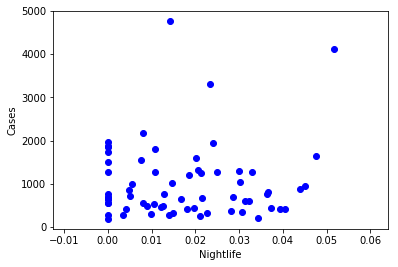

In [143]:
plt.scatter(cdf.Nightlife, cdf.Cases,  color='blue')
plt.xlabel("Nightlife")
plt.ylabel("Cases")
plt.show()

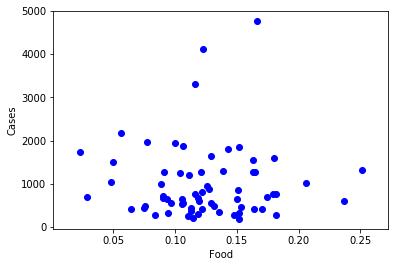

In [145]:
plt.scatter(cdf.Food, cdf.Cases,  color='blue')
plt.xlabel("Food")
plt.ylabel("Cases")
plt.show()

In [146]:
msk = np.random.rand(len(df)) < 0.8
train = cdf[msk]
test = cdf[~msk]

In [147]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['Food','Nightlife']])
y = np.asanyarray(train[['Cases']])
regr.fit (x, y)
# The coefficients
print ('Coefficients: ', regr.coef_)

Coefficients:  [[-2050.00169589  8835.19309307]]


In [148]:
y_hat= regr.predict(test[['Food','Nightlife']])
x = np.asanyarray(test[['Food','Nightlife']])
y = np.asanyarray(test[['Cases']])
print("Residual sum of squares: %.2f"
      % np.mean((y_hat - y) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(x, y))

Residual sum of squares: 1443337.84
Variance score: -0.13


In [150]:
# import k-means from clustering stage
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 5

LA_clustering = cdf

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(LA_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 3, 1, 3, 0, 3, 4, 4, 1], dtype=int32)

In [152]:
# add clustering labels
df.insert(0, 'ClusterLabels', kmeans.labels_)

df

,ClusterLabels,Cluster Labels,name,Arts & Entertainment,College & University,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,areaName,date
0,0,0,Adur,0.011696,0.040936,0.000000,0.152047,0.000000,0.111111,0.000000,0.000000,0.093567,0.070175,184,Adur,2020-07-01
1,0,0,Arun,0.019900,0.004975,0.000000,0.151741,0.014925,0.106965,0.007463,0.000000,0.082090,0.067164,319,Arun,2020-07-01
2,3,3,Babergh,0.013333,0.000000,0.000000,0.106667,0.000000,0.013333,0.000000,0.000000,0.173333,0.066667,560,Ashfield,2020-07-01
3,1,1,Blaenau Gwent,0.018182,0.000000,0.000000,0.090909,0.000000,0.072727,0.000000,0.000000,0.163636,0.072727,1269,Ashford,2020-07-01
4,3,3,Bridgend,0.006623,0.023179,0.000000,0.115894,0.036424,0.056291,0.000000,0.000000,0.112583,0.089404,759,Aylesbury Vale,2020-07-01
5,0,0,Bromsgrove,0.021053,0.000000,0.000000,0.110526,0.021053,0.042105,0.000000,0.000000,0.168421,0.084211,259,Babergh,2020-07-01
6,3,3,Caerphilly,0.005000,0.010000,0.000000,0.090000,0.005000,0.055000,0.000000,0.000000,0.110000,0.100000,708,Barking and Dagenham,2020-07-01
7,4,4,Cardiff,0.016064,0.017403,0.000000,0.180054,0.020080,0.061580,0.003347,0.000000,0.081660,0.044846,1585,Barnet,2020-07-01
8,4,4,Carmarthenshire,0.036765,0.018382,0.000000,0.106618,0.000000,0.073529,0.000000,0.003676,0.150735,0.099265,1874,Barnsley,2020-07-01
9,1,1,Ceredigion,0.027027,0.018018,0.000000,0.126126,0.045045,0.072072,0.018018,0.000000,0.126126,0.036036,939,Basingstoke and Deane,2020-07-01


In [ ]:
#normalise the CumCases on 0-1 basis

In [159]:
pdf = df[['ClusterLabels','Food','Nightlife Spot','CumCases']]
pdf.rename(columns={ 'Nightlife Spot':'Nightlife', 'CumCases':'Cases'}, inplace=True)
pdf.head(9)

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/frame.py:4025: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


,ClusterLabels,Food,Nightlife,Cases
0,0,0.152047,0.000000,184
1,0,0.151741,0.014925,319
2,3,0.106667,0.000000,560
3,1,0.090909,0.000000,1269
4,3,0.115894,0.036424,759
5,0,0.110526,0.021053,259
6,3,0.090000,0.005000,708
7,4,0.180054,0.020080,1585
8,4,0.106618,0.000000,1874


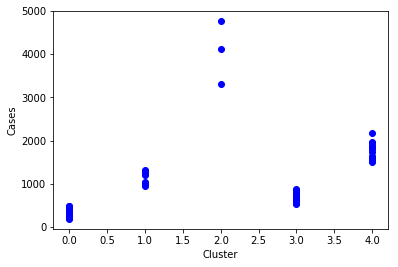

In [160]:
plt.scatter(pdf.ClusterLabels, pdf.Cases,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Cases")
plt.show()

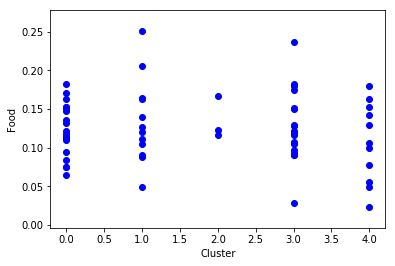

In [161]:
plt.scatter(pdf.ClusterLabels, pdf.Food,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Food")
plt.show()

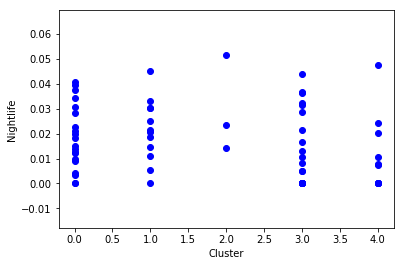

In [162]:
plt.scatter(pdf.ClusterLabels, pdf.Nightlife,  color='blue')
plt.xlabel("Cluster")
plt.ylabel("Nightlife")
plt.show()

In [163]:
df.loc[df['Cluster Labels'] ==2,df.columns[[1] + list(range(5, df.shape[1]))]]

,Cluster Labels,Event,Food,Nightlife Spot,Outdoors & Recreation,Professional & Other Places,Residence,Shop & Service,Travel & Transport,CumCases,areaName,date
14,2,0.000000,0.166667,0.014184,0.095745,0.008865,0.0,0.062057,0.056738,4764,Birmingham,2020-07-01
21,2,0.000000,0.122581,0.051613,0.049462,0.000000,0.0,0.090323,0.038710,4123,Bradford,2020-07-01
47,2,0.011628,0.116279,0.023256,0.058140,0.011628,0.0,0.127907,0.069767,3303,County Durham,2020-07-01
